# 2.1.2 Unsupervised learning algorithms dendrogram
### The following script contains the following:

#### 1. Import libraries, additional requirements
#### 2. Import Data
#### 3. Scale the data features
        - export new scaled data 'unsupervised' folder
#### 4. Scale down the features of VALENTIA for last decade
#### 5. Create dendrogram
        - single
        - complete
        - average
        - ward
#### 6. Dimensionality reduction
        - PCA
---------------------------------------------------------------------------------------------------------------------------
## 1. Import libraries, additional requirements
---------------------------------------------------------------------------------------------------------------------------

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [4]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

# Turning off warning feature
import warnings
warnings.filterwarnings('ignore')

# Supress scientific notation for easier analysis profiling
pd.set_option('display.float_format', '{:.2f}'.format)

---------------------------------------------------------------------------------------------------------------------------
## 2.Import Data

In [7]:
# Create a path for importing
path = r'C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project'

In [9]:
pleasant = pd.read_csv(os.path.join(path, '02 Data', 'Original_Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [11]:
scaled = pd.read_csv(os.path.join(path, '02 Data', 'UnSupervised', 'weather_data_scaled.csv'))
scaled

,Unnamed: 0,DATE,MONTH,id,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,1,-1.73,0.66,-0.03,0.83,-0.00,-1.10,-0.27,...,-0.44,0.76,-1.30,-0.81,-0.09,-0.02,0.37,-0.67,-0.52,-0.75
1,1,19600102,1,-1.73,0.24,-0.03,0.74,-0.00,-1.06,1.66,...,0.78,1.18,-1.26,-1.04,0.50,-0.02,-0.83,-0.55,-0.63,-0.41
2,2,19600103,1,-1.73,1.08,-0.03,1.28,-0.00,-1.25,0.16,...,0.78,1.18,-0.43,-1.14,-0.40,-0.02,-1.01,-0.07,0.05,-0.18
3,3,19600104,1,-1.73,-1.00,-0.03,1.46,-0.00,-0.82,-0.45,...,0.78,0.48,0.39,-1.18,0.67,-0.02,-1.04,-1.00,-0.16,-0.84
4,4,19600105,1,-1.73,0.24,-0.03,1.73,-0.00,-0.75,-0.16,...,-1.67,-0.36,1.73,-0.79,-0.49,-0.02,0.67,-1.51,-1.34,-1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,22945,20221027,10,1.73,-1.83,-0.03,0.28,1.04,-0.01,-0.00,...,-0.44,-0.08,-0.00,-0.01,-0.01,-0.02,-0.02,-0.01,-0.00,-0.00
22946,22946,20221028,10,1.73,0.24,-0.03,0.10,0.98,-0.01,-0.00,...,-0.44,-0.08,-0.00,-0.01,-0.01,-0.02,-0.02,-0.01,-0.00,-0.00
22947,22947,20221029,10,1.73,-0.59,-0.03,0.01,0.72,-0.01,-0.00,...,-0.44,-0.08,-0.00,-0.01,-0.01,-0.02,-0.02,-0.01,-0.00,-0.00
22948,22948,20221030,10,1.73,-0.17,-0.03,0.37,0.49,-0.01,-0.00,...,-0.44,-0.08,-0.00,-0.01,-0.01,-0.02,-0.02,-0.01,-0.00,-0.00


In [16]:
# Drop the DATE and MONTH data as those numbers are not scaled with the rest.
drop_features = scaled.drop(['MONTH',
                         # GDANSK features
                         'GDANSK_cloud_cover', 'GDANSK_humidity',
                         'GDANSK_precipitation', 'GDANSK_snow_depth',
                         'GDANSK_temp_mean', 'GDANSK_temp_min', 'GDANSK_temp_max',
                         # ROMA features
                         'ROMA_cloud_cover', 'ROMA_humidity', 'ROMA_pressure',
                         'ROMA_sunshine', 'ROMA_temp_mean',
                         # TOURS features
                         'TOURS_humidity', 'TOURS_pressure',
                         'TOURS_global_radiation', 'TOURS_precipitation',
                         'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max'], axis=1)
drop_features

,Unnamed: 0,DATE,id,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,-1.73,0.66,-0.03,0.83,-0.00,-1.10,-0.27,-0.18,...,-0.44,0.76,-1.30,-0.81,-0.09,-0.02,0.37,-0.67,-0.52,-0.75
1,1,19600102,-1.73,0.24,-0.03,0.74,-0.00,-1.06,1.66,-0.18,...,0.78,1.18,-1.26,-1.04,0.50,-0.02,-0.83,-0.55,-0.63,-0.41
2,2,19600103,-1.73,1.08,-0.03,1.28,-0.00,-1.25,0.16,-0.18,...,0.78,1.18,-0.43,-1.14,-0.40,-0.02,-1.01,-0.07,0.05,-0.18
3,3,19600104,-1.73,-1.00,-0.03,1.46,-0.00,-0.82,-0.45,-0.18,...,0.78,0.48,0.39,-1.18,0.67,-0.02,-1.04,-1.00,-0.16,-0.84
4,4,19600105,-1.73,0.24,-0.03,1.73,-0.00,-0.75,-0.16,-0.18,...,-1.67,-0.36,1.73,-0.79,-0.49,-0.02,0.67,-1.51,-1.34,-1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,22945,20221027,1.73,-1.83,-0.03,0.28,1.04,-0.01,-0.00,-0.18,...,-0.44,-0.08,-0.00,-0.01,-0.01,-0.02,-0.02,-0.01,-0.00,-0.00
22946,22946,20221028,1.73,0.24,-0.03,0.10,0.98,-0.01,-0.00,-0.18,...,-0.44,-0.08,-0.00,-0.01,-0.01,-0.02,-0.02,-0.01,-0.00,-0.00
22947,22947,20221029,1.73,-0.59,-0.03,0.01,0.72,-0.01,-0.00,-0.18,...,-0.44,-0.08,-0.00,-0.01,-0.01,-0.02,-0.02,-0.01,-0.00,-0.00
22948,22948,20221030,1.73,-0.17,-0.03,0.37,0.49,-0.01,-0.00,-0.18,...,-0.44,-0.08,-0.00,-0.01,-0.01,-0.02,-0.02,-0.01,-0.00,-0.00


In [18]:
# Save fully scaled dataset without 3 weather stations [ROMA, GDANSK, TOURS]

drop_features.to_csv(os.path.join(path, '02 Data', 'UnSupervised', 'scaled-full-drop-3-stations.csv'), index=False)

---------------------------------------------------------------------------------------------------------------------------
## 4. Scale down the features of VALENTIA for last decade

In [26]:
# Merge data sets using (inner join)
#merge = drop_features.merge(pleasant, on='DATE')
#merge

In [28]:
# Check data types
#merge.dtypes

In [30]:
# Convert the 'DATE' column to string type
#merge['DATE'] = merge['DATE'].astype(str)

# Extract the year from the 'DATE' column and convert it to integer type
#merge['Year'] = merge['DATE'].str[:4].astype(int)

# Filter the DataFrame for the years between 2012 and 2022
#features = merge[(merge['Year'] >= 2012) & (merge['Year'] <= 2022)]

# Now filtered_df contains data only for the years between 2012 and 2022

In [32]:
# Use datetime instead of string - dont merge data


# Convert 'DATE' column to string
drop_features['DATE'] = drop_features['DATE'].astype(str)

# Convert string dates to datetime format
drop_features['DATE'] = pd.to_datetime(drop_features['DATE'], format='%Y%m%d')

# Verify the conversion
drop_features['DATE']

0       1960-01-01
1       1960-01-02
2       1960-01-03
3       1960-01-04
4       1960-01-05
           ...    
22945   2022-10-27
22946   2022-10-28
22947   2022-10-29
22948   2022-10-30
22949   2022-10-31
Name: DATE, Length: 22950, dtype: datetime64[ns]

In [34]:
# Define the start and end dates of the range
start_date = '2000-01-01'
end_date = '2010-10-31'

# Filter data based on the specified range
features = drop_features[(drop_features['DATE'] >= start_date) & (drop_features['DATE'] <= end_date)]

# View new dataframe features
features

,Unnamed: 0,DATE,id,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
14610,14610,2000-01-01,0.47,1.08,-0.03,1.19,1.62,-1.23,-0.39,-0.18,...,0.17,0.90,0.86,-1.08,-0.37,-0.02,-0.83,-1.24,-1.59,-0.72
14611,14611,2000-01-02,0.47,1.08,-0.03,1.01,2.11,-1.18,-0.45,-0.18,...,1.40,1.32,0.32,-1.18,0.01,-0.02,-1.04,-0.34,-0.16,-0.84
14612,14612,2000-01-03,0.47,-0.17,-0.03,0.46,2.05,-0.91,-0.45,-0.18,...,-1.06,-0.50,0.11,-1.08,0.75,-0.02,-0.68,-0.64,-0.16,-1.04
14613,14613,2000-01-04,0.47,0.66,-0.03,0.28,1.25,-0.77,0.26,-0.18,...,0.17,-0.93,-0.40,-0.91,-0.09,-0.02,0.01,-0.79,-0.79,-1.67
14614,14614,2000-01-05,0.47,-0.17,-0.03,1.28,1.01,-0.90,-0.31,-0.18,...,0.78,-0.22,-1.73,-1.20,-0.10,-0.02,-1.04,-0.91,-1.07,-0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18562,18562,2010-10-27,1.07,-0.17,-1.53,-0.44,1.40,-0.36,-0.45,-0.18,...,-0.44,-0.08,-0.00,-0.65,-0.01,-0.02,-0.02,-0.01,-0.00,0.46
18563,18563,2010-10-28,1.07,-0.17,-1.26,-0.71,0.96,-0.56,-0.45,-0.18,...,-0.44,-0.08,-0.00,-1.05,-0.01,-0.02,-0.02,-0.01,-0.00,0.54
18564,18564,2010-10-29,1.07,-0.59,0.52,-0.62,-0.64,-0.24,-0.45,-0.18,...,-0.44,-0.08,-0.00,-0.82,-0.01,-0.02,-0.02,-0.01,-0.00,-0.15
18565,18565,2010-10-30,1.07,0.66,-1.80,0.10,-1.59,-0.82,-0.45,-0.18,...,-0.44,-0.08,-0.00,-0.50,-0.01,-0.02,-0.02,-0.01,-0.00,0.31


In [36]:
# Save features scaled and merged dataset without 3 weather stations [ROMA, GDANSK, TOURS]

features.to_csv(os.path.join(path, '02 Data', 'UnSupervised', 'scaled-features-last-decade.csv'), index=False)

In [38]:
features.dtypes

Unnamed: 0                      int64
DATE                   datetime64[ns]
id                            float64
BASEL_cloud_cover             float64
BASEL_wind_speed              float64
                            ...      
VALENTIA_snow_depth           float64
VALENTIA_sunshine             float64
VALENTIA_temp_mean            float64
VALENTIA_temp_min             float64
VALENTIA_temp_max             float64
Length: 152, dtype: object

In [40]:
# Filter for columns starting with 'DATE' and 'VALENTIA'
valentia_c = features.filter(like='VALENTIA')
dc = features.filter(like='DATE')
valentia_dc = valentia_c.merge(dc, left_index=True, right_index=True)

# Print the DataFrame
valentia_dc

,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,DATE
14610,0.17,0.90,0.86,-1.08,-0.37,-0.02,-0.83,-1.24,-1.59,-0.72,2000-01-01
14611,1.40,1.32,0.32,-1.18,0.01,-0.02,-1.04,-0.34,-0.16,-0.84,2000-01-02
14612,-1.06,-0.50,0.11,-1.08,0.75,-0.02,-0.68,-0.64,-0.16,-1.04,2000-01-03
14613,0.17,-0.93,-0.40,-0.91,-0.09,-0.02,0.01,-0.79,-0.79,-1.67,2000-01-04
14614,0.78,-0.22,-1.73,-1.20,-0.10,-0.02,-1.04,-0.91,-1.07,-0.64,2000-01-05
...,...,...,...,...,...,...,...,...,...,...,...
18562,-0.44,-0.08,-0.00,-0.65,-0.01,-0.02,-0.02,-0.01,-0.00,0.46,2010-10-27
18563,-0.44,-0.08,-0.00,-1.05,-0.01,-0.02,-0.02,-0.01,-0.00,0.54,2010-10-28
18564,-0.44,-0.08,-0.00,-0.82,-0.01,-0.02,-0.02,-0.01,-0.00,-0.15,2010-10-29
18565,-0.44,-0.08,-0.00,-0.50,-0.01,-0.02,-0.02,-0.01,-0.00,0.31,2010-10-30


In [42]:
# Use pleasant weather datetime for merge


# Convert 'DATE' column to string
pleasant['DATE'] = drop_features['DATE'].astype(str)

# Convert string dates to datetime format
pleasant['DATE'] = pd.to_datetime(drop_features['DATE'], format='%Y%m%d')

# Verify the conversion
pleasant['DATE']

# Define the start and end dates of the range
start_date = '2000-01-01'
end_date = '2010-10-31'

# Filter data based on the specified range
features_p = pleasant[(pleasant['DATE'] >= start_date) & (pleasant['DATE'] <= end_date)]

# View new dataframe features
features_p

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
14610,2000-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14611,2000-01-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14612,2000-01-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14613,2000-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14614,2000-01-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18562,2010-10-27,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
18563,2010-10-28,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
18564,2010-10-29,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
18565,2010-10-30,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [44]:
# Subset the DataFrame for the specified columns
features_s = features_p[['DATE', 'VALENTIA_pleasant_weather']]
features_s

,DATE,VALENTIA_pleasant_weather
14610,2000-01-01,0
14611,2000-01-02,0
14612,2000-01-03,0
14613,2000-01-04,0
14614,2000-01-05,0
...,...,...
18562,2010-10-27,0
18563,2010-10-28,0
18564,2010-10-29,0
18565,2010-10-30,0


In [46]:
# Merge valentia with valentia_pleasant_weather

valentia_m = valentia_dc.merge(features_s, on='DATE')
valentia_m

,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,DATE,VALENTIA_pleasant_weather
0,0.17,0.90,0.86,-1.08,-0.37,-0.02,-0.83,-1.24,-1.59,-0.72,2000-01-01,0
1,1.40,1.32,0.32,-1.18,0.01,-0.02,-1.04,-0.34,-0.16,-0.84,2000-01-02,0
2,-1.06,-0.50,0.11,-1.08,0.75,-0.02,-0.68,-0.64,-0.16,-1.04,2000-01-03,0
3,0.17,-0.93,-0.40,-0.91,-0.09,-0.02,0.01,-0.79,-0.79,-1.67,2000-01-04,0
4,0.78,-0.22,-1.73,-1.20,-0.10,-0.02,-1.04,-0.91,-1.07,-0.64,2000-01-05,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3952,-0.44,-0.08,-0.00,-0.65,-0.01,-0.02,-0.02,-0.01,-0.00,0.46,2010-10-27,0
3953,-0.44,-0.08,-0.00,-1.05,-0.01,-0.02,-0.02,-0.01,-0.00,0.54,2010-10-28,0
3954,-0.44,-0.08,-0.00,-0.82,-0.01,-0.02,-0.02,-0.01,-0.00,-0.15,2010-10-29,0
3955,-0.44,-0.08,-0.00,-0.50,-0.01,-0.02,-0.02,-0.01,-0.00,0.31,2010-10-30,0


In [48]:
# Realign datafram
valentia_m = valentia_m[['DATE', 'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure',
                         'VALENTIA_global_radiation', 'VALENTIA_precipitation', 'VALENTIA_snow_depth',
                         'VALENTIA_sunshine', 'VALENTIA_temp_mean', 'VALENTIA_temp_min', 'VALENTIA_temp_max',
                         'VALENTIA_pleasant_weather']]
valentia_m

,DATE,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,VALENTIA_pleasant_weather
0,2000-01-01,0.17,0.90,0.86,-1.08,-0.37,-0.02,-0.83,-1.24,-1.59,-0.72,0
1,2000-01-02,1.40,1.32,0.32,-1.18,0.01,-0.02,-1.04,-0.34,-0.16,-0.84,0
2,2000-01-03,-1.06,-0.50,0.11,-1.08,0.75,-0.02,-0.68,-0.64,-0.16,-1.04,0
3,2000-01-04,0.17,-0.93,-0.40,-0.91,-0.09,-0.02,0.01,-0.79,-0.79,-1.67,0
4,2000-01-05,0.78,-0.22,-1.73,-1.20,-0.10,-0.02,-1.04,-0.91,-1.07,-0.64,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3952,2010-10-27,-0.44,-0.08,-0.00,-0.65,-0.01,-0.02,-0.02,-0.01,-0.00,0.46,0
3953,2010-10-28,-0.44,-0.08,-0.00,-1.05,-0.01,-0.02,-0.02,-0.01,-0.00,0.54,0
3954,2010-10-29,-0.44,-0.08,-0.00,-0.82,-0.01,-0.02,-0.02,-0.01,-0.00,-0.15,0
3955,2010-10-30,-0.44,-0.08,-0.00,-0.50,-0.01,-0.02,-0.02,-0.01,-0.00,0.31,0


In [50]:
# Drop date column for hierarchial clustering
valentia_m = valentia_m.drop(columns=['DATE'])
valentia_m

,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,VALENTIA_pleasant_weather
0,0.17,0.90,0.86,-1.08,-0.37,-0.02,-0.83,-1.24,-1.59,-0.72,0
1,1.40,1.32,0.32,-1.18,0.01,-0.02,-1.04,-0.34,-0.16,-0.84,0
2,-1.06,-0.50,0.11,-1.08,0.75,-0.02,-0.68,-0.64,-0.16,-1.04,0
3,0.17,-0.93,-0.40,-0.91,-0.09,-0.02,0.01,-0.79,-0.79,-1.67,0
4,0.78,-0.22,-1.73,-1.20,-0.10,-0.02,-1.04,-0.91,-1.07,-0.64,0
...,...,...,...,...,...,...,...,...,...,...,...
3952,-0.44,-0.08,-0.00,-0.65,-0.01,-0.02,-0.02,-0.01,-0.00,0.46,0
3953,-0.44,-0.08,-0.00,-1.05,-0.01,-0.02,-0.02,-0.01,-0.00,0.54,0
3954,-0.44,-0.08,-0.00,-0.82,-0.01,-0.02,-0.02,-0.01,-0.00,-0.15,0
3955,-0.44,-0.08,-0.00,-0.50,-0.01,-0.02,-0.02,-0.01,-0.00,0.31,0


---------------------------------------------------------------------------------------------------------------------------
## 4. Create dendrogram
- ### Single

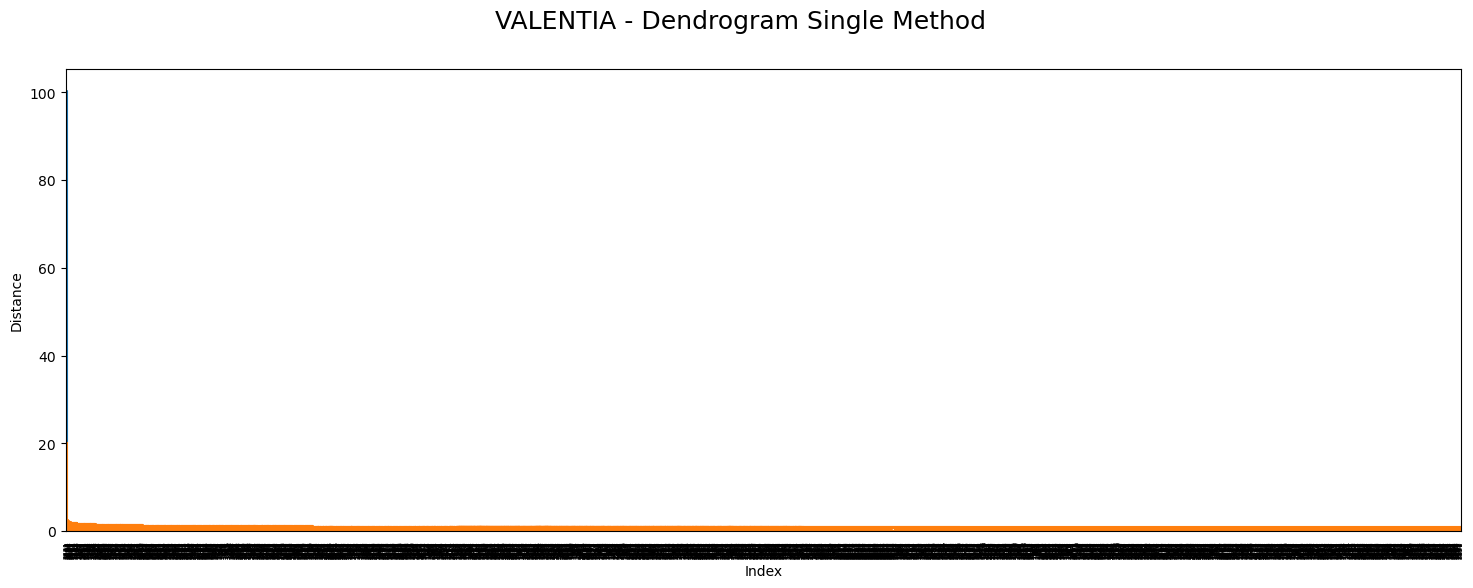

In [57]:
distance_single = linkage(valentia_m.loc[:,['VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure', 'VALENTIA_global_radiation',
                                         'VALENTIA_precipitation', 'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
                                         'VALENTIA_temp_min', 'VALENTIA_temp_max']], method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("VALENTIA - Dendrogram Single Method",fontsize=18)

# Specify the path and file name
output_file = r"C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project\04 Analysis\Visualizations\VALENTIA - Dendrogram Single Method.png"

# Save the plot as a PNG file at the specified location
plt.savefig(output_file)

# Display the plot
plt.show()

- **note:** no discernable clusters

- ### Complete

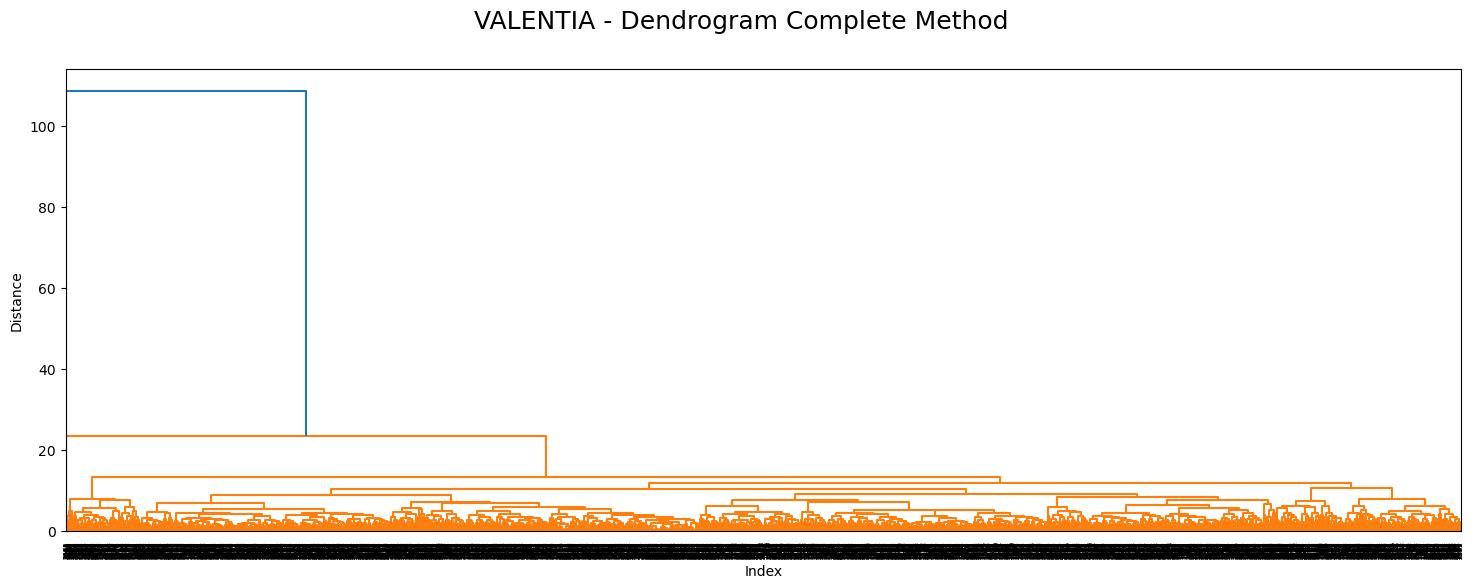

In [62]:
distance_complete = linkage(valentia_m.loc[:,['VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure', 'VALENTIA_global_radiation',
                                         'VALENTIA_precipitation', 'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
                                         'VALENTIA_temp_min', 'VALENTIA_temp_max']], method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("VALENTIA - Dendrogram Complete Method",fontsize=18)

# Specify the path and file name
output_file = r"C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project\04 Analysis\Visualizations\VALENTIA - Dendrogram Complete Method.png"

# Save the plot as a PNG file at the specified location
plt.savefig(output_file)

# Display the plot
plt.show()

- **note:** no discernable clusters

- ### Average

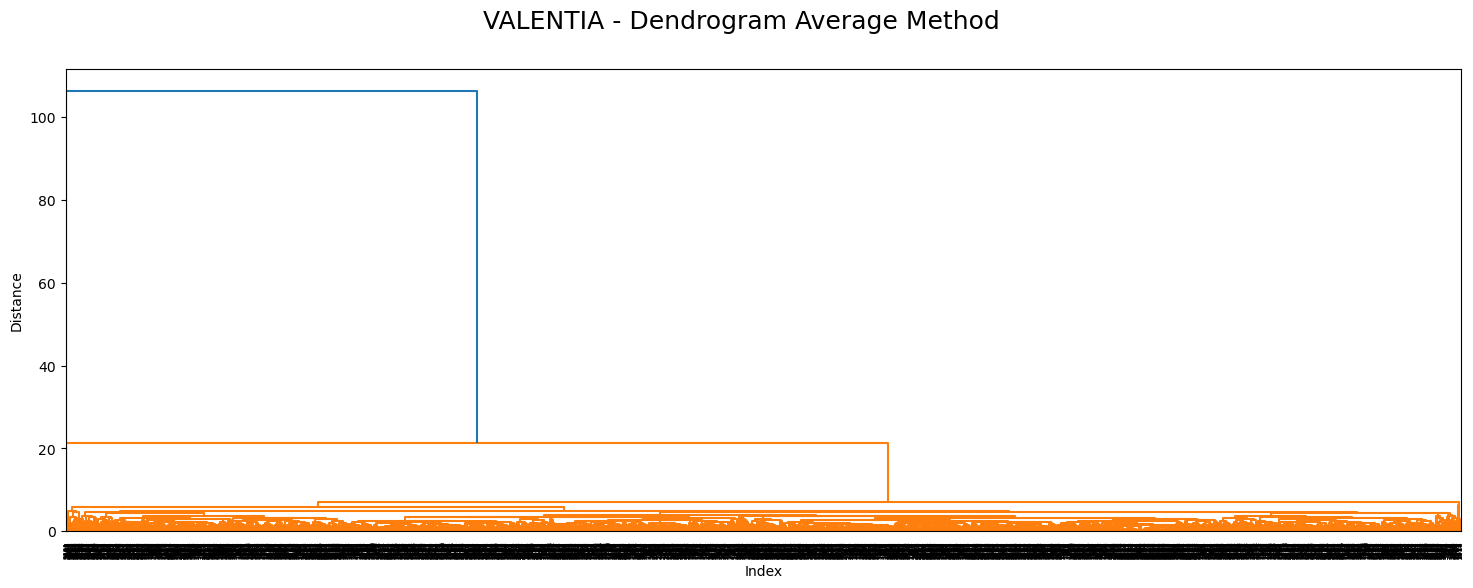

In [65]:
distance_average = linkage(valentia_m.loc[:,['VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure', 'VALENTIA_global_radiation',
                                         'VALENTIA_precipitation', 'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
                                         'VALENTIA_temp_min', 'VALENTIA_temp_max']], method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("VALENTIA - Dendrogram Average Method",fontsize=18)
# Specify the path and file name
output_file = r"C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project\04 Analysis\Visualizations\VALENTIA - Dendrogram Average Method.png"

# Save the plot as a PNG file at the specified location
plt.savefig(output_file)

# Display the plot
plt.show()


- **note:** similar to complete method, no discernable clusters

- ### Ward

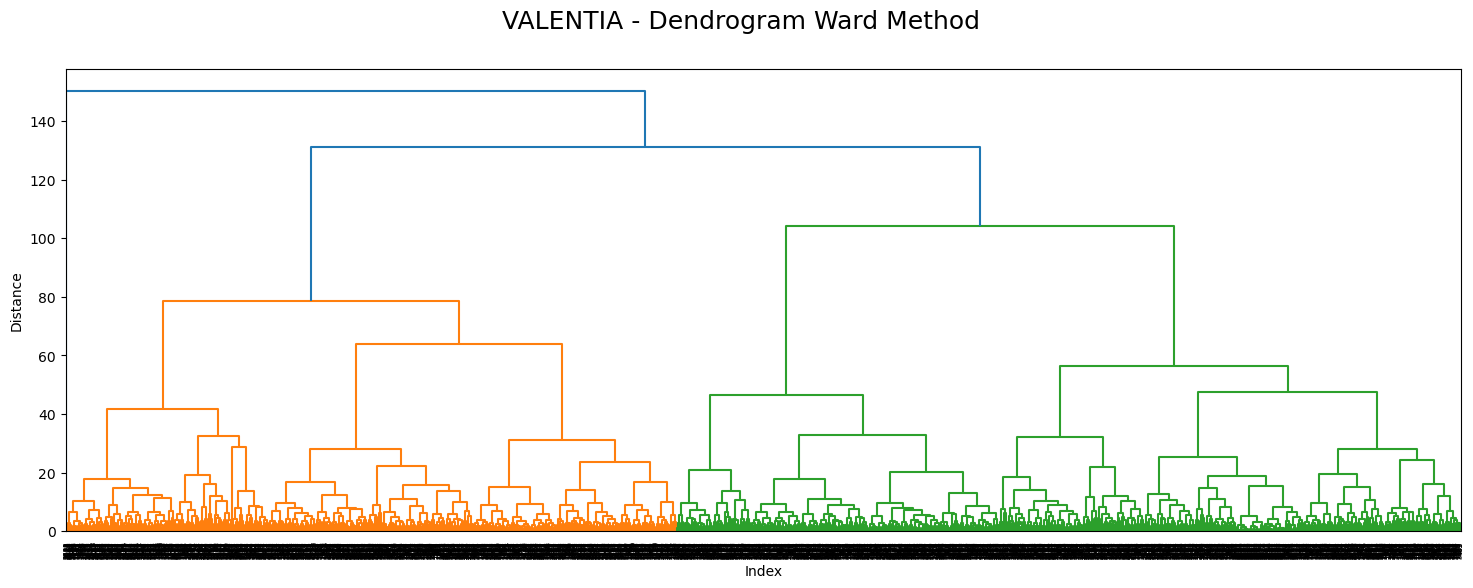

In [69]:
distance_ward = linkage(valentia_m.loc[:,['VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure', 'VALENTIA_global_radiation',
                                         'VALENTIA_precipitation', 'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
                                         'VALENTIA_temp_min', 'VALENTIA_temp_max']], method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("VALENTIA - Dendrogram Ward Method",fontsize=18)

# Specify the path and file name
output_file = r"C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project\04 Analysis\Visualizations\VALENTIA - Dendrogram Ward Method.png"

# Save the plot as a PNG file at the specified location
plt.savefig(output_file)

# Display the plot
plt.show()

- **note:** 2-4 mostly-discernable clusters, most optimal method. These discernable clusters represent that the model is finding associated patterns within the data efficiently.

---------------------------------------------------------------------------------------------------------------------------
## 5. Dimensionality reduction
- #### PCA

In [73]:
#Run the PCA model, reducing to 5 components (%50), as we have 10 components in our weather_scaled_data
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(valentia_m)

In [75]:
principalComponents

array([[ 1.17863901, -1.52207892, -1.702181  ,  1.24008222,  0.93003383],
       [ 1.59590036,  0.26097497, -2.07024982,  0.71971953,  0.38994652],
       [ 1.2986044 , -1.33328869, -0.0650916 ,  0.32458669, -0.29552562],
       ...,
       [ 0.26160964, -0.41362139, -0.28161082,  0.08919384,  0.01885284],
       [ 0.04144147, -0.19680636, -0.08738633,  0.0605801 ,  0.07255345],
       [ 0.19144221, -0.4399372 , -0.19252839,  0.06023932,  0.07553392]])

In [77]:
#Make a dataframe of the new components
dfPCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'])

In [79]:
dfPCA

,PCA1,PCA2,PCA3,PCA4,PCA5
0,1.18,-1.52,-1.70,1.24,0.93
1,1.60,0.26,-2.07,0.72,0.39
2,1.30,-1.33,-0.07,0.32,-0.30
3,0.97,-2.01,-0.71,-0.38,-0.47
4,1.68,-1.15,-1.62,-1.44,-0.20
...,...,...,...,...,...
3952,0.05,-0.15,-0.11,0.07,0.04
3953,0.16,-0.14,-0.24,0.11,-0.03
3954,0.26,-0.41,-0.28,0.09,0.02
3955,0.04,-0.20,-0.09,0.06,0.07


In [81]:
#Add the weather outcomes to the dataframe to show the relationship
V_answers = valentia_m['VALENTIA_pleasant_weather']
V_answers

0       0
1       0
2       0
3       0
4       0
       ..
3952    0
3953    0
3954    0
3955    0
3956    0
Name: VALENTIA_pleasant_weather, Length: 3957, dtype: int64

In [83]:
dfPCA['V_answers']= valentia_m['VALENTIA_pleasant_weather']

In [85]:
dfPCA

,PCA1,PCA2,PCA3,PCA4,PCA5,V_answers
0,1.18,-1.52,-1.70,1.24,0.93,0
1,1.60,0.26,-2.07,0.72,0.39,0
2,1.30,-1.33,-0.07,0.32,-0.30,0
3,0.97,-2.01,-0.71,-0.38,-0.47,0
4,1.68,-1.15,-1.62,-1.44,-0.20,0
...,...,...,...,...,...,...
3952,0.05,-0.15,-0.11,0.07,0.04,0
3953,0.16,-0.14,-0.24,0.11,-0.03,0
3954,0.26,-0.41,-0.28,0.09,0.02,0
3955,0.04,-0.20,-0.09,0.06,0.07,0


In [89]:
dfPCA['V_answers'].value_counts(dropna=False)

V_answers
0    3756
1     201
Name: count, dtype: int64

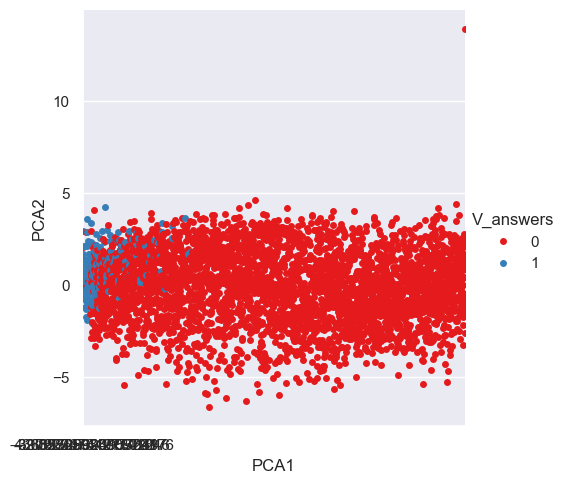

In [107]:
# PLot the two components, color coded by VALENTIA pleasant weather outcomes (V_answers)
sns.set_theme()
g = sns.catplot(x="PCA1", y="PCA2", palette='Set1', hue="V_answers", data=dfPCA)
plt.xticks([0, 40, 80, 120, 149])

# Specify the path and file name
output_file = r"C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project\04 Analysis\Visualizations\ color coded by VALENTIA pleasant weather outcomes.png"

# Save the plot as a PNG file at the specified location
plt.savefig(output_file)

# Display the plot
plt.show()

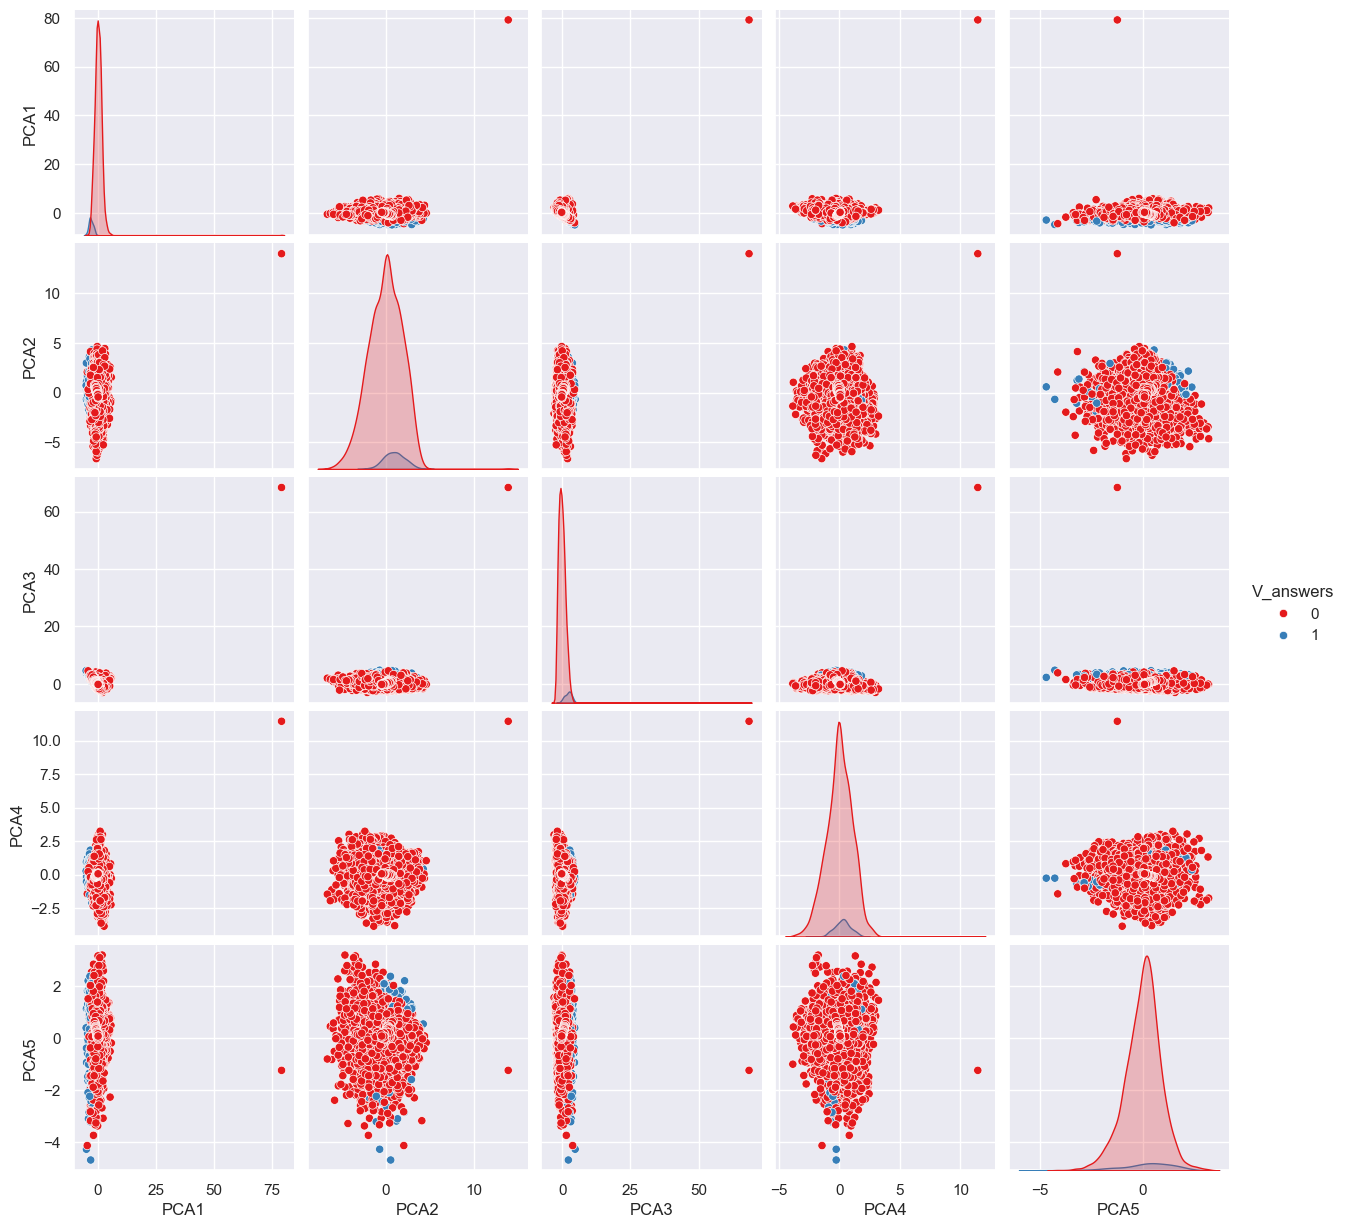

In [114]:
sns.pairplot(dfPCA, hue="V_answers", palette='Set1')

# Specify the path and file name
output_file = r"C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project\04 Analysis\Visualizations\valentia-PCA_dimensionality-reduction-2000-2010-pair-plot.jpg"

# Save the plot as a PNG file at the specified location
plt.savefig(output_file)

# Display the plot
plt.show()

### From 2000-01-01 - 2010-12-31, VALENTIA has had more non pleasant days then pleasant days.
### In the past decade VALENTIA has had no pleasant weather days.

In [95]:
# Run the PCA model, reducing to 1 component
pca = PCA(n_components=1)
principalComponents2 = pca.fit_transform(valentia_m)

In [96]:
principalComponents2

array([[1.17863901],
       [1.59590036],
       [1.2986044 ],
       ...,
       [0.26160964],
       [0.04144147],
       [0.19144221]])

In [97]:
# Add the binary outcomes for VALENTIA pleasant weather to the dataframe to show the relationship
dfPCA2 = pd.DataFrame(principalComponents2, columns=['PCA1'])
dfPCA2['y']= 0
dfPCA2['V_answers']= valentia_m['VALENTIA_pleasant_weather']
dfPCA2

,PCA1,y,V_answers
0,1.18,0,0
1,1.60,0,0
2,1.30,0,0
3,0.97,0,0
4,1.68,0,0
...,...,...,...
3952,0.05,0,0
3953,0.16,0,0
3954,0.26,0,0
3955,0.04,0,0


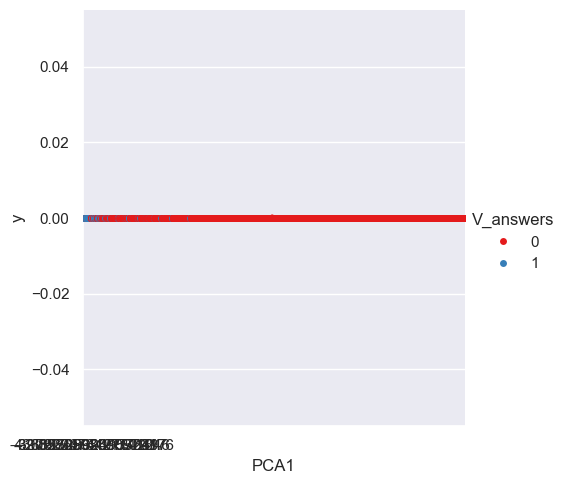

In [116]:
# PLot the component, color coded by pleasant weather answers
sns.set_theme()
g = sns.catplot(x="PCA1", y='y', palette='Set1', hue="V_answers", data=dfPCA2)
plt.xticks([0, 40, 80, 120, 149])

# Specify the path and file name
output_file = r"C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project\04 Analysis\Visualizations\valentia-PCA_dimensionality-reduction-2000-2010-cat-plot-1-component.png"

# Save the plot as a PNG file at the specified location
plt.savefig(output_file)

# Display the plot
plt.show()

#### Reduced to 1 component - from 2000-01-01 - 2010-12-31, VALENTIA has had more non pleasant days then pleasant days.
#### No pleasant weather days in the past decade for VALENTIA weather statio.

# Export datasets 

In [118]:
valentia_m.to_csv(os.path.join(path, '02 Data', 'UnSupervised', 'valentia_scaled_decade.csv'), index=False)

In [120]:
dfPCA.to_csv(os.path.join(path, '02 Data', 'UnSupervised', 'PCA1.csv'), index=False)

In [122]:
dfPCA2.to_csv(os.path.join(path, '02 Data', 'UnSupervised', 'PCA2.csv'), index=False)

----------------------------------------------------------------------------------------------------------------